In [1]:
from portfolio_optimizer import Portfolio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def simulate_asset_prices(num_of_assets, steps, mean_log_returns=0.0003, stddev_log_returns=0.005, starting_value=100):
    """Simulate asset prices according to the given parameters. Assumes returns to be log-normal distributed.

    Parameters
    ----------
    num_of_assets : int
        The number of individual assets to be simulated, i.e., the number of columns of the outputed DataFrame
    steps : int
        The number of time steps to be simulated, i.e., the number of rows of the outputed DataFrame
    mean_log_returns : float, optional
        The mean of log returns of all assets in each time step (default is 0.0003)
    stddev_log_returns : float, optional
        The standard deviation of log returns of all assets in each time step (default is 0.0005)
    starting_value : float, optional
        The starting price of all assets (default is 100)

    Returns
    -------
    DataFrame
        A DataFrame of simulated asset prices
    """
    
    price_df = {}
    for i in range(num_of_assets):
        temp = np.random.normal(1+mean_log_returns, stddev_log_returns, steps-1)
        temp = temp.cumprod()
        temp = np.append(1, temp)
        temp = temp * starting_value
        price_df[f'asset_{i+1}'] = temp
    return pd.DataFrame(price_df)

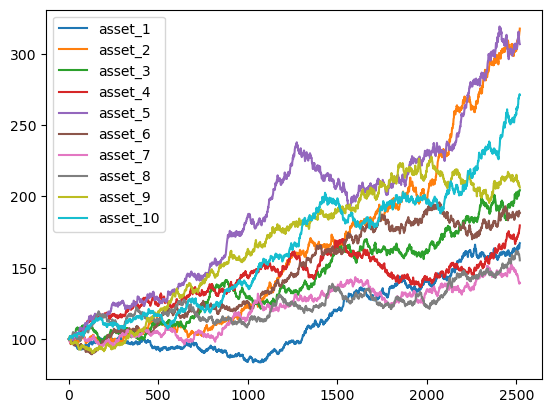

In [3]:
price_df = simulate_asset_prices(10, 2520)
price_df.plot()
plt.show()

In [4]:
portfolio = Portfolio(price_df, apply_shrinkage=False)
sharpe_func = lambda x: -portfolio.compute_portfolio_return(x) / portfolio.compute_portfolio_variance(x)**.5 * 252**.5
res = portfolio.minimize_func(sharpe_func)
best_weights = pd.Series(res.x, price_df.columns)

print('------------------- Best weights -------------------')
print(best_weights)
print('\n')
print('----------------- Portfolio Sharpe -----------------')
print(-res.fun)

------------------- Best weights -------------------
asset_1     0.078922
asset_2     0.144423
asset_3     0.102334
asset_4     0.081238
asset_5     0.149101
asset_6     0.096994
asset_7     0.052282
asset_8     0.062150
asset_9     0.094100
asset_10    0.138458
dtype: float64


----------------- Portfolio Sharpe -----------------
3.248756207198103
